# Absolute_EEG

### Importing libraries

In [1]:
import pandas as pd

from my_defs import (create_datasets, discriminate_target_association,
                     encoding_one_hot, normalize, predict, generate_samples, explore_dataset)

### Dataset exploration

In [2]:
data = pd.read_excel("EEG - Sortie Variables.xlsx", "Absolues")
data

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,25.0,0,0,0,3,1,Travaux_2,1,Manger,161,0,1,0,1,3.05014,1.6497,0.000000,0,5.454692,1,3.103440,1,0,1,1,0,1,1,0,1,1,0,56.84,69.20,62.78,59.71,60.10,59.51,56.70,58.26,56.20,53.52,56.09,70.58,63.82,59.71,60.84,58.99,55.68,57.29,55.16,52.23,53.55,64.97,59.92,57.61,57.67,57.68,53.48,54.95,52.92,49.89,54.23,67.56,64.68,60.32,60.90,59.84,55.15,58.63,54.09,48.18,60.22,72.34,64.62,61.95,62.14,62.08,59.71,60.68,59.34,57.83,57.67,64.20,56.82,1.129884
1,01DJ,25.0,0,0,0,5,4,Abs. Marquage,2,Lecture,351,1,1,2,0,2.65012,NaN,0.000000,0,4.167806,1,0.264597,0,0,0,1,0,1,0,0,1,0,1,52.65,64.78,61.24,58.52,58.89,58.23,53.60,56.98,52.56,47.07,52.20,65.87,62.00,58.61,59.30,58.00,53.39,56.74,52.38,45.87,50.27,63.01,59.89,56.76,57.16,56.53,51.18,54.71,50.10,44.11,52.52,66.39,62.18,59.21,59.32,59.08,54.40,58.09,53.24,45.51,53.93,65.60,62.75,60.09,60.84,59.62,54.25,58.14,53.06,48.79,53.46,61.95,54.18,1.143411
2,01DJ,25.0,0,0,0,6,5,Météo,3,Conversation,224,0,0,0,0,8.00000,NaN,0.000000,0,2.861475,1,0.065688,0,0,0,1,0,1,0,0,1,0,1,55.43,65.82,62.09,59.27,59.61,59.02,55.44,57.25,54.86,51.77,54.67,67.61,63.64,59.67,60.38,59.07,54.60,56.81,53.93,50.02,52.25,64.53,60.14,57.11,57.77,56.75,51.78,53.89,51.07,48.24,53.65,66.71,64.50,60.77,62.05,60.17,54.26,57.91,53.12,47.34,58.88,67.31,62.90,61.13,61.32,61.02,58.49,59.28,58.20,56.76,56.53,63.81,56.07,1.138042
3,01DJ,25.0,0,0,0,1,1,Travaux_1,4,Jeu vidéo,128,0,0,1,1,2.00009,1.2935,0.000000,0,5.495789,1,3.184360,1,0,1,0,0,1,1,0,0,0,0,10.00,66.05,62.68,59.64,60.14,59.24,55.65,57.52,55.06,51.18,54.62,67.48,63.66,60.02,60.81,59.37,54.86,57.16,54.16,49.63,52.37,64.15,61.44,57.68,58.25,57.36,52.60,55.07,51.81,47.54,53.54,66.19,62.89,60.08,60.86,59.46,54.70,57.53,53.81,47.46,58.43,67.98,65.28,61.63,62.53,61.06,58.17,59.63,57.72,55.30,55.46,63.53,55.32,1.148409
4,01DJ,25.0,0,0,0,4,3,Accident,5,Radio,647,2,0,0,1,1.80011,1.27713,0.000000,0,4.874436,1,2.860760,1,0,1,0,0,1,1,0,0,0,0,43.58,65.37,60.99,58.71,58.32,58.77,54.32,56.67,53.55,48.72,53.19,66.57,62.17,59.78,59.12,59.87,54.13,57.06,53.15,47.28,50.53,63.38,59.07,56.02,56.23,55.83,51.19,54.00,50.31,45.19,52.94,67.00,63.59,60.41,61.04,59.88,54.45,58.05,53.31,45.89,54.76,66.46,61.85,58.33,58.78,57.91,54.62,56.73,53.97,51.10,54.91,62.41,55.35,1.127552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [3]:
explore_dataset(data)

DESCRIPTION


,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,ID NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,356.000000,357.000000,356.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,43.190476,0.733894,0.490196,0.476190,3.462185,2.658263,3.487395,411.921569,0.812325,0.336134,0.675070,0.616246,2.868189,16.953112,0.364146,9.131148,0.759104,2.103643,0.675070,0.075630,0.624650,0.789916,0.336134,0.717087,0.591036,0.288515,0.619048,0.487395,0.291317,38.257675,48.169552,44.101064,42.013221,42.700476,161.94591,38.431261,39.933501,37.964874,34.760672,35.922381,47.062381,42.900504,39.706583,40.719496,39.027003,35.892381,37.325154,35.478375,31.893782,34.077703,43.705126,40.158908,38.053445,38.721036,37.650448,34.448936,35.757367,34.007339,30.176555,36.729048,178.960252,43.243053,41.406303,42.122297,40.994818,37.048095,39.022465,36.420952,32.487479,40.488235,50.612978,46.689664,43.964454,44.856751,43.381961,40.295014,41.928095,39.784034,37.170756,53.010644,44.310476,38.271961,1.165365
std,16.741806,0.827409,0.500605,0.500134,1.706514,1.489955,1.705241,322.424923,0.801028,0.473049,0.750109,0.486982,1.498398,29.055883,0.481865,10.551726,0.428228,1.391294,0.469006,0.264777,0.484893,0.407940,0.473049,0.451047,0.492333,0.453708,0.486302,0.500543,0.455007,8.014340,8.404033,8.036748,7.880011,7.909786,2274.40855,7.897784,7.905059,7.901983,7.977929,8.567734,8.847691,8.745440,8.626800,8.636244,8.680835,8.627559,8.827437,8.598263,8.827186,7.582613,8.097354,7.939808,7.550483,7.655474,7.565677,7.607572,7.590251,7.642939,7.896667,8.116495,2488.830836,8.564931,8.333188,8.464116,8.288851,8.227794,8.454502,8.255664,8.253978,9.660832,9.620606,9.648609,9.476932,9.545609,9.482426,9.640211,9

****************************************************************************************************
INFORMATIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 87 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Sujet                                                       357 non-null    object 
 1   Age                                                         357 non-null    float64
 2   Age category                                                357 non-null    int64  
 3   Gender                                                      357 non-null    int64  
 4   Scenario                                                    357 non-null    int64  
 5   ID scenario Event                                           357 non-null    int64  
 6   ID Event                                                    357 

None

****************************************************************************************************
PRESENCE OF NULL VALUE(S)?


Sujet                                                             0
Age                                                               0
Age category                                                      0
Gender                                                            0
Scenario                                                          0
ID scenario Event                                                 0
ID Event                                                          0
Event                                                             0
ID NDRT                                                           0
NDRT                                                              0
NDRT duration (s)                                                 0
NDRT duration                                                     0
NDRT solicitation hands                                           0
NDRT solicitation gaze                                            0
Lane changing                                   

****************************************************************************************************
PRESENCE OF DUPLICATED SAMPLE(S)?


0

****************************************************************************************************


### Data Processing (data cleaning and restructuring)

In [4]:
df = data.copy()

>**We can see that the variables that we can judge as categorical are not all in the 'object' format, which could cause us problems later.**
>
> **To start, we will convert the categorical variables to 'object'**

In [5]:
var_to_object = ['Gender',
                 'ID Event',
                 'ID NDRT',
                 'NDRT duration (s)',
                 'NDRT solicitation hands',
                 'NDRT solicitation gaze',
                 'Lane changing']

In [6]:
df[var_to_object]= df[var_to_object].astype('object')

> **We are going to normalize the continuous variables**

In [7]:
df_normalized = normalize(df, normalization_type='minmax')
df_normalized

,Sujet,Age,Age category,Gender,Scenario,ID scenario Event,ID Event,Event,ID NDRT,NDRT,NDRT duration (s),NDRT duration,NDRT solicitation hands,NDRT solicitation gaze,Lane changing,TOT (s),TTC (s),Brake force (daN),Braking,Standard deviation \nsteering wheel \nrotation speed (° / s),Steering wheel rotation speed,Max Absolute Value Lateral Shift,ILC,Collision,Checking mirrors,"TOQ (Coll a/oTTC < 1,5s)",TOQ (Coll a/o braking),TOQ (Coll a/o steering),TOQ (Coll a/o mirrors),TOQ (Coll a/o(TTC<1s & braking),TOQ (Coll a/o(TTC<1s & steering),TOQ (Coll a/o(TTC<1s & mirror),TOQ (Coll a/o ILC),TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
0,01DJ,0.028571,0.0,0,0.0,0.4,1,Travaux_2,1,Manger,161,0.0,1,0,1,0.282625,1.6497,0.000000,0.0,0.035965,1.0,0.626606,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.620808,0.451926,0.434230,0.442467,0.436123,0.000595,0.475806,0.471409,0.477590,0.528365,0.584225,0.577476,0.542610,0.561526,0.569900,0.563192,0.586576,0.575234,0.590170,0.622205,0.564103,0.506235,0.666908,0.538229,0.517894,0.557489,0.572016,0.551384,0.577607,0.607247,0.561798,0.000671,0.586905,0.578235,0.599677,0.574029,0.591503,0.733154,0.588175,0.562903,0.828267,0.727925,0.764277,0.786494,0.775589,0.796213,0.826598,0.805611,0.832368,0.851820,0.005585,0.418456,0.442055,0.414017
1,01DJ,0.028571,0.0,0,0.0,0.8,4,Abs. Marquage,2,Lecture,351,0.5,1,2,0,0.224651,NaN,0.000000,0.0,0.027208,1.0,0.046067,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.565275,0.382712,0.409128,0.421907,0.415622,0.000565,0.418988,0.449093,0.409894,0.407602,0.511174,0.502236,0.511150,0.542272,0.543740,0.545790,0.544348,0.565532,0.538217,0.497450,0.498907,0.473205,0.666546,0.522142,0.508338,0.535741,0.526945,0.546834,0.521919,0.486880,0.526217,0.000646,0.541310,0.556471,0.571352,0.558657,0.576185,0.725876,0.570725,0.505582,0.767955,0.653290,0.747025,0.768999,0.763392,0.773036,0.774806,0.781619,0.772723,0.766770,0.004778,0.386464,0.401207,0.432272
2,01DJ,0.028571,0.0,0,0.0,1.0,5,Météo,3,Conversation,224,0.0,0,0,0,1.000000,NaN,0.000000,0.0,0.018318,1.0,0.005390,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.602121,0.398998,0.422983,0.434865,0.427821,0.000584,0.452713,0.453801,0.452669,0.495600,0.557559,0.530032,0.539499,0.560826,0.562086,0.564598,0.566661,0.566767,0.567184,0.578854,0.538263,0.498820,0.669562,0.528766,0.519768,0.539902,0.538703,0.531286,0.541074,0.572886,0.549730,0.000653,0.583622,0.587059,0.620294,0.580704,0.573325,0.723450,0.568261,0.544869,0.815419,0.672226,0.748409,0.778781,0.767896,0.786226,0.815026,0.792387,0.821541,0.841754,0.005367,0.412911,0.430450,0.425026
3,01DJ,0.028571,0.0,0,0.0,0.0,1,Travaux_1,4,Jeu vidéo,128,0.0,0,1,1,0.130443,1.2935,0.000000,0.0,0.036245,1.0,0.643154,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.402599,0.432600,0.441258,0.436801,0.000589,0.456562,0.458508,0.456388,0.484553,0.556620,0.527955,0.539844,0.566953,0.569390,0.569872,0.571455,0.572941,0.571482,0.571204,0.540648,0.492417,0.685246,0.539553,0.528761,0.551437,0.554772,0.553659,0.555687,0.558309,0.547441,0.000642,0.554259,0.5

### Dataset creation

>**We will start by separating the features from the targets**

In [8]:
X_lane, y_lane, X_no_lane, y_no_lane, X_TOT, y_TOT = create_datasets(df_normalized, only_physio_datas=False)

### Reduction of dimensions according to the link of each figure with the targets.

**The objective here will be to measure the association of each feature with each target to exclude variables that have no impact with the targets.**

In [9]:
X_lane_reduced, lane_pvalues = discriminate_target_association(X_lane,y_lane)

In [10]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001
TOQ (Coll a/o(TTC<1s & braking),0.029,0.174,0.063,0.03,0.023,0.393,0.269,0.163,0.097,0.123,0.139,0.138,0.14,0.15,0.127,0.123,0.059,0.046,0.001,0.001,0.0,0.0,0.001,0.0,0.0,0.0,0.001,0.004,0.005,0.005,0.009,0.016,0.006,0.01,0.009,0.012,0.004,0.93,0.277,0.44,0.473,0.504,0.506,0.5,0.398,0.53,0.34,0.052,0.097,0.082,0.084,0.088,0.085,0.056,0.071,0.053,0.04,0.0,0.0,0.002,0.93,0.029,0.174,0.063,0.03,0.023,0.393,0.269,0.163,0.097,0.123,0.139,0.138,0.14,0.15,0.127,0.123,0.059,0.046,0.001,0.001,0.0,0.0,0.001,0.0,0.0,0.0,0.001,0.004,0.005,0.005,0.009,0.016,0.006,0.01,0.009,0.012,0.004,0.93,0.277,0.44,0.473,0.504,0.506,0.5,0.398,0.53,0.34,0.052,0.097,0.082,0.084,0.088,0.085,0.056,0.071,0.053,0.04,0.0,0.0,0.002,0.93
TOQ (Coll a/o(TTC<1s & steering),0.009,0.782,0.036,0.604,0.001,0.884,0.824,0.179,0.08,0.108,0.111,0.127,0.095,0.065,0.052,0.033,0.184,0.041,0.013,0.018,0.005,0.009,0.006,0.003,0.002,0.006,0.04,0.016,0.123,0.092,0.044,0.104,0.043,0.011,0.012,0.011,0.01,0.709,0.24,0.41,0.397,0.593,0.317,0.181,0.21,0.17,0.144,0.134,0.119,0.172,0.253,0.28,0.234,0.134,0.182,0.122,0.112,0.343,0.003,0.022,0.249,0.009,0.782,0.036,0.604,0.001,0.884,0.824,0.179,0.08,0.108,0.111,0.127,0.095,0.065,0.052,0.033,0.184,0.041,0.013,0.018,0.005,0.009,0.006,0.003,0.002,0.006,0.04,0.016,0.123,0.092,0.044,0.104,

In [11]:
for key, value in X_lane_reduced.items():
    print(f"{key}: {value.shape}")

TOQ (Coll a/o(TTC<1s & braking): (220, 27)
TOQ (Coll a/o(TTC<1s & steering): (220, 23)
TOQ (Coll a/o(TTC<1s & mirror): (220, 2)


### TAKE-OVER WITH LANE CHANGING

In [12]:
X_lane_encoded = encoding_one_hot(X_lane_reduced)
list(X_lane_encoded.values())[0]

,Age,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,ID NDRT_1,ID NDRT_2,ID NDRT_3,ID NDRT_4,ID NDRT_5,ID NDRT_6,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872
0,0.028571,0.584225,0.577476,0.542610,0.561526,0.569900,0.563192,0.586576,0.575234,0.590170,0.622205,0.564103,0.506235,0.666908,0.538229,0.517894,0.557489,0.572016,0.551384,0.577607,0.607247,0.851820,0.005585,0.418456,0.442055,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.028571,0.556620,0.527955,0.539844,0.566953,0.569390,0.569872,0.571455,0.572941,0.571482,0.571204,0.540648,0.492417,0.685246,0.539553,0.528761,0.551437,0.554772,0.553659,0.555687,0.558309,0.828018,0.005162,0.408929,0.418846,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0.028571,0.529765,0.513419,0.514088,0.562752,0.540683,0.578661,0.557994,0.571177,0.552607,0.525108,0.504075,0.479441,0.656653,0.508138,0.490912,0.522504,0.527141,0.533371,0.526066,0.509371,0.788503,0.005056,0.393004,0.419310,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,0.028571,0.527136,0.500479,0.518410,0.565727,0.540683,0.581473,0.559653,0.577174,0.553355,0.516869,0.506659,0.482642,0.669441,0.525927,0.506652,0.540658,0.533608,0.540197,0.531991,0.501249,0.778248,0.004863,0.386606,0.409717,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6,0.028571,0.435493,0.454633,0.413656,0.419569,0.429930,0.421515,0.444588,0.442053,0.445898,0.453511,0.474260,0.448264,0.640005,0.449849,0.469552,0.440620,0.480894,0.465301,0.487362,0.497085,0.878352,1.000000,0.349780,0.373511,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,0.922449,0.136150,0.162620,0.143647,0.156660,0.172244,0.159255,0.162087,0.184865,0.155298,0.131620,0.116875,0.098921,0.411630,0.095572,0.081881,0.111384,0.160102,0.157186,0.163310,0.110579,0.602220,0.001110,0.099104,0.090206,0,1,0,0,0,0,0,0,0,0,0,1,0,0
349,0.922449,0.150798,0.196805,0.161452,0.166112,0.187532,0.164704,0.157846,0.159817,0.157914,0.160063,0.120851,0.112572,0.416456,0.101060,0.091437,0.114410,0.138742,0.121350,0.146524,0.134527,0.612852,0.001138,0.101095,0.085873,0,0,0,1,0,0,1,0,0,0,0,0,0,0
351,0.922449,0.141972,0.177955,0.127053,0.145108,0.160014,0.148356,0.180527,0.180455,0.181088,0.133778,0.122441,0.163802,0.409579,0.122067,0.080007,0.156959,0.149520,0.152636,0.150671,0.116410,0.603349,0.001276,0.086734,0.109082,0,0,0,0,0,1,0,1,0,0,0,0,0,0
352,0.922449,0.197746,0.311342,0.229041,0.177490,0.228979,0.155212,0.181449,0.162639,0.188189,0.219106,0.162989,0.241153,0.390518,0.108819,0.084317,0.132186,0.169116,0.138225,0.181280,0.198251,0.641923,0.002089,0.174037,0.144979,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001
TOQ (Coll a/o(TTC<1s & braking),0.029,0.174,0.063,0.03,0.023,0.393,0.269,0.163,0.097,0.123,0.139,0.138,0.14,0.15,0.127,0.123,0.059,0.046,0.001,0.001,0.0,0.0,0.001,0.0,0.0,0.0,0.001,0.004,0.005,0.005,0.009,0.016,0.006,0.01,0.009,0.012,0.004,0.93,0.277,0.44,0.473,0.504,0.506,0.5,0.398,0.53,0.34,0.052,0.097,0.082,0.084,0.088,0.085,0.056,0.071,0.053,0.04,0.0,0.0,0.002,0.93,0.029,0.174,0.063,0.03,0.023,0.393,0.269,0.163,0.097,0.123,0.139,0.138,0.14,0.15,0.127,0.123,0.059,0.046,0.001,0.001,0.0,0.0,0.001,0.0,0.0,0.0,0.001,0.004,0.005,0.005,0.009,0.016,0.006,0.01,0.009,0.012,0.004,0.93,0.277,0.44,0.473,0.504,0.506,0.5,0.398,0.53,0.34,0.052,0.097,0.082,0.084,0.088,0.085,0.056,0.071,0.053,0.04,0.0,0.0,0.002,0.93
TOQ (Coll a/o(TTC<1s & steering),0.009,0.782,0.036,0.604,0.001,0.884,0.824,0.179,0.08,0.108,0.111,0.127,0.095,0.065,0.052,0.033,0.184,0.041,0.013,0.018,0.005,0.009,0.006,0.003,0.002,0.006,0.04,0.016,0.123,0.092,0.044,0.104,0.043,0.011,0.012,0.011,0.01,0.709,0.24,0.41,0.397,0.593,0.317,0.181,0.21,0.17,0.144,0.134,0.119,0.172,0.253,0.28,0.234,0.134,0.182,0.122,0.112,0.343,0.003,0.022,0.249,0.009,0.782,0.036,0.604,0.001,0.884,0.824,0.179,0.08,0.108,0.111,0.127,0.095,0.065,0.052,0.033,0.184,0.041,0.013,0.018,0.005,0.009,0.006,0.003,0.002,0.006,0.04,0.016,0.123,0.092,0.044,0.104,

In [14]:
for key in y_lane:
    display(pd.DataFrame(lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o(TTC<1s & braking)
FRONTAL THETA,0.0
Fz ALPHA TOTAL 8-13Hz,0.0
Fz ALPHA LOW 8-10Hz,0.0
FRONTAL THETA,0.0
Fz BETA HIGH 17-30Hz,0.0
Fz BETA LOW 13-17Hz,0.0
Fz ALPHA LOW 8-10Hz,0.0
Fz ALPHA TOTAL 8-13Hz,0.0
Fz BETA TOTAL 13-30Hz,0.0
Fz BETA LOW 13-17Hz,0.0


,TOQ (Coll a/o(TTC<1s & steering)
NDRT duration (s),0.001
NDRT duration (s),0.001
Fz BETA LOW 13-17Hz,0.002
Fz BETA LOW 13-17Hz,0.002
FRONTAL THETA,0.003
Fz BETA TOTAL 13-30Hz,0.003
Fz BETA TOTAL 13-30Hz,0.003
FRONTAL THETA,0.003
Fz ALPHA TOTAL 8-13Hz,0.005
Fz ALPHA TOTAL 8-13Hz,0.005


,TOQ (Coll a/o(TTC<1s & mirror)
NDRT duration (s),0.001
NDRT duration (s),0.001
Age,0.005
Age,0.005
ID Event,0.073
ID Event,0.073
Gender,0.124
Gender,0.124
FRONTAL THETA,0.168
FRONTAL THETA,0.168


TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,28,6
1.0,6,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        34
         1.0       0.40      0.40      0.40        10

    accuracy                           0.73        44
   macro avg       0.61      0.61      0.61        44
weighted avg       0.73      0.73      0.73        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,32,2
1.0,8,2


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86        34
         1.0       0.50      0.20      0.29        10

    accuracy                           0.77        44
   macro avg       0.65      0.57      0.58        44
weighted avg       0.73      0.77      0.73        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,28,6
1.0,6,4


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        34
         1.0       0.40      0.40      0.40        10

    accuracy                           0.73        44
   macro avg       0.61      0.61      0.61        44
weighted avg       0.73      0.73      0.73        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,32,2
1.0,10,0


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84        34
         1.0       0.00      0.00      0.00        10

    accuracy                           0.73        44
   macro avg       0.38      0.47      0.42        44
weighted avg       0.59      0.73      0.65        44

************************************



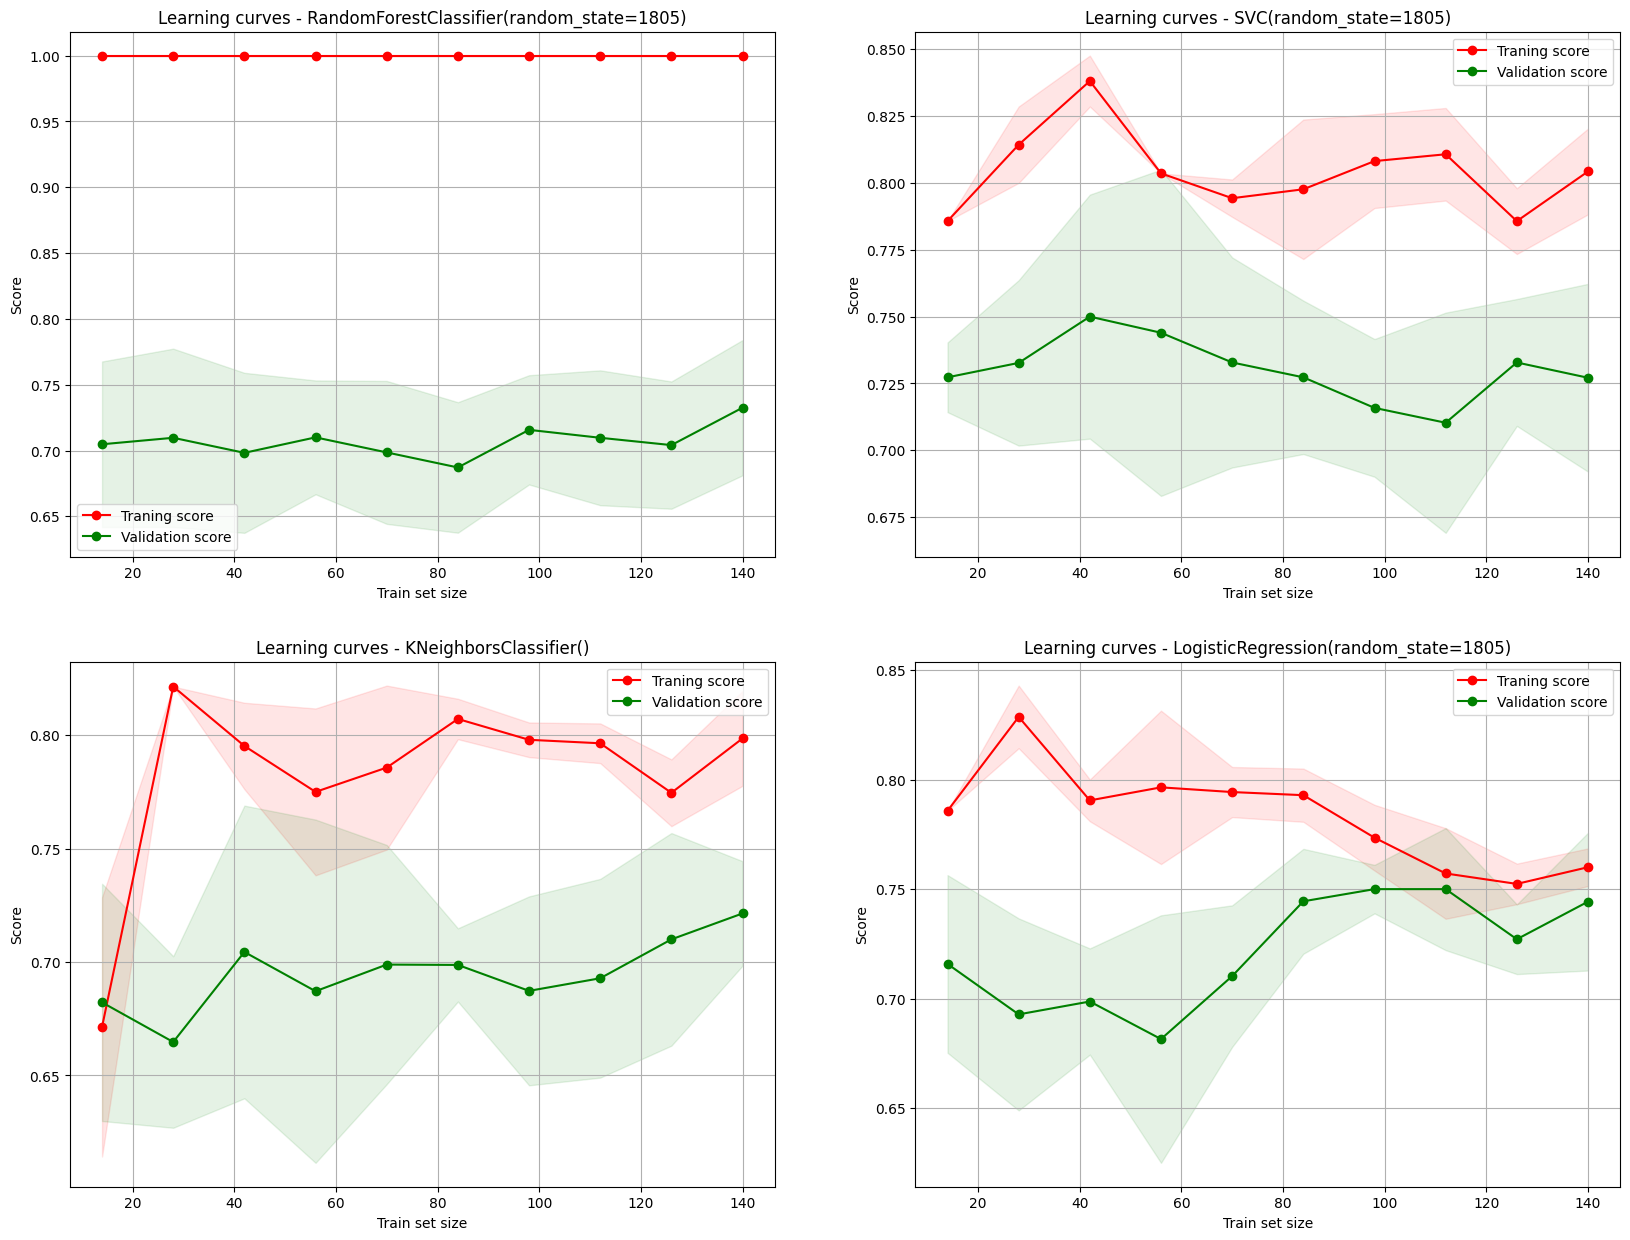

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.90,0.73,0.40,-0.05,Overfitting :0.19,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.69,0.77,0.29,-0.07,Underfitting :-0.12,too much complex
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 3, 'p': 4, 'weights': 'distance'}",1.00,0.73,0.40,-0.05,Overfitting :0.27,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.76,0.73,0.00,-0.27,Overfitting :0.04,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,14,9
1.0,11,10


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.56      0.61      0.58        23
         1.0       0.53      0.48      0.50        21

    accuracy                           0.55        44
   macro avg       0.54      0.54      0.54        44
weighted avg       0.54      0.55      0.54        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,16,7
1.0,11,10


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.59      0.70      0.64        23
         1.0       0.59      0.48      0.53        21

    accuracy                           0.59        44
   macro avg       0.59      0.59      0.58        44
weighted avg       0.59      0.59      0.59        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,19,4
1.0,11,10


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.83      0.72        23
         1.0       0.71      0.48      0.57        21

    accuracy                           0.66        44
   macro avg       0.67      0.65      0.64        44
weighted avg       0.67      0.66      0.65        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,15,8
1.0,5,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70        23
         1.0       0.67      0.76      0.71        21

    accuracy                           0.70        44
   macro avg       0.71      0.71      0.70        44
weighted avg       0.71      0.70      0.70        44

************************************



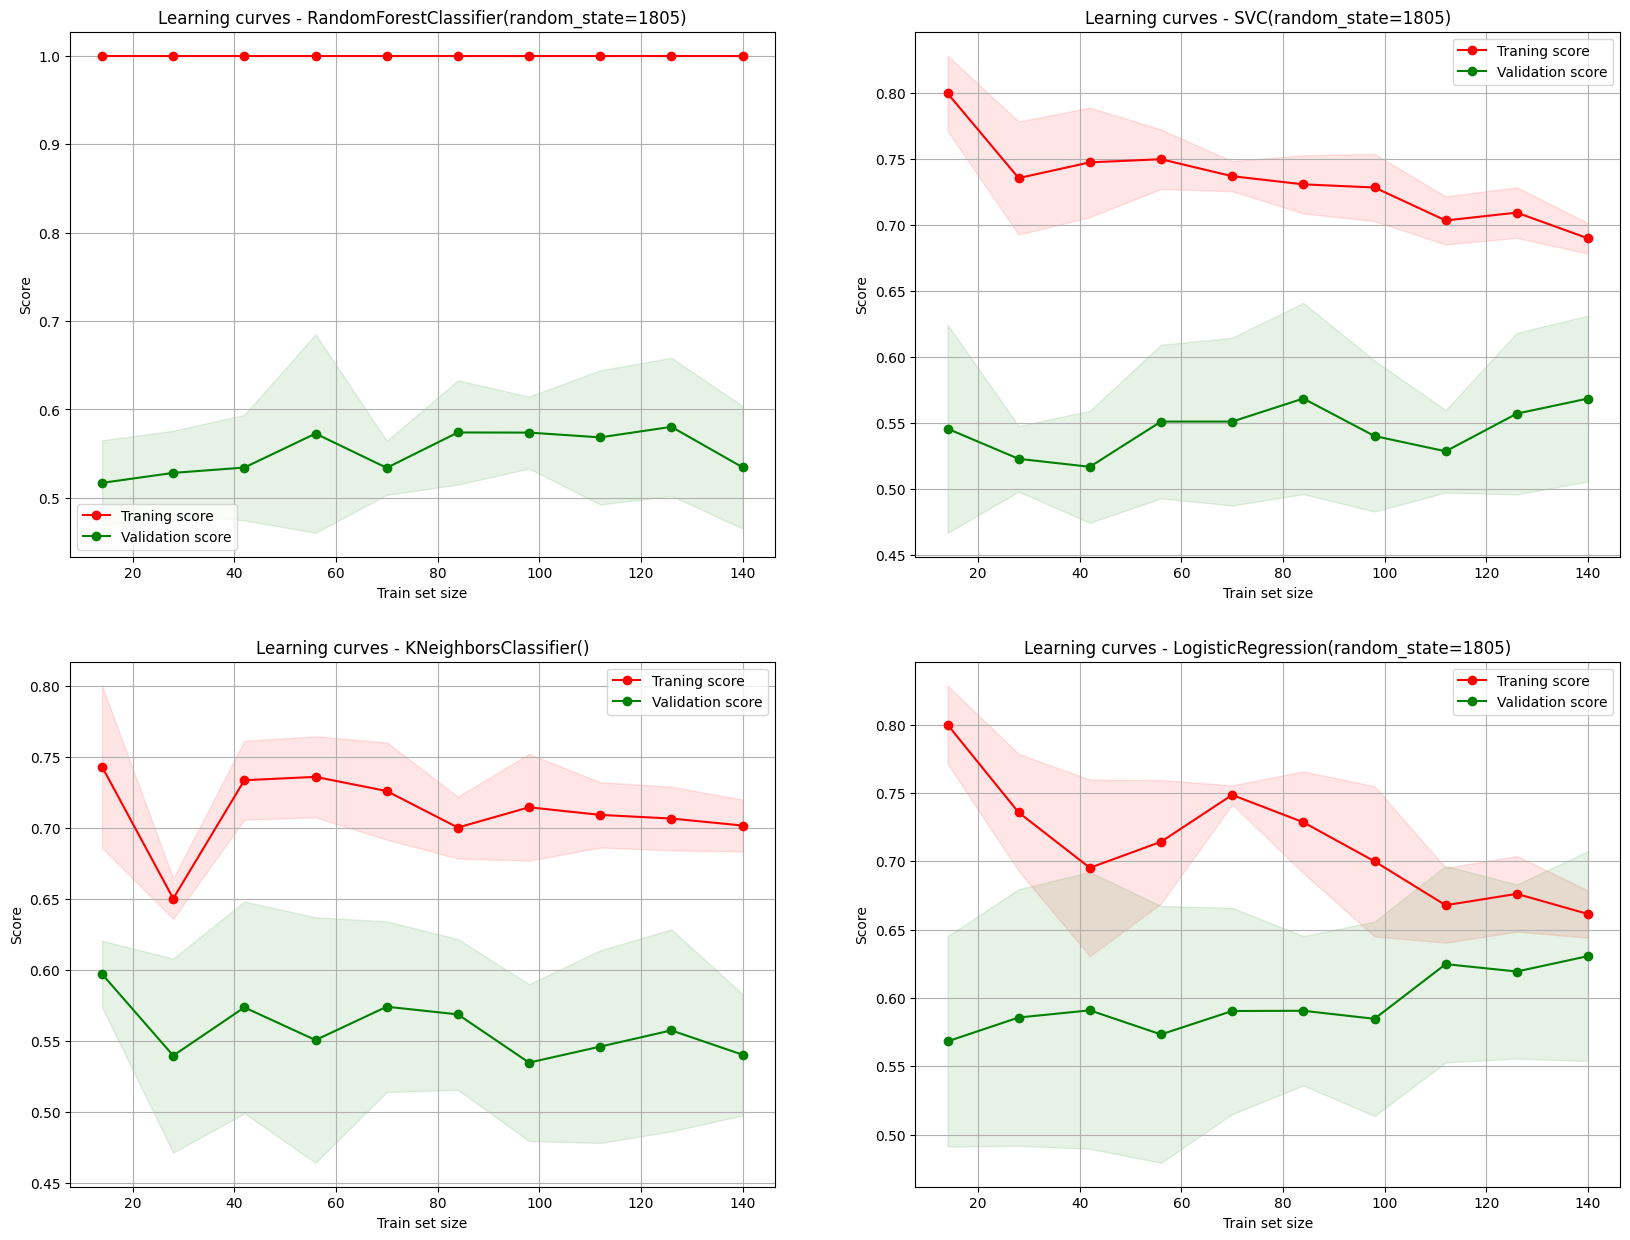

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.97,0.55,0.50,-0.25,Overfitting :0.43,too much complex
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.63,0.59,0.53,-0.17,Overfitting :0.06,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}",0.67,0.66,0.57,-0.04,Overfitting :0.01,not complexe enough
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.64,0.70,0.71,0.09,Underfitting :-0.09,too much complex


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,12,13
1.0,3,16


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.48      0.60        25
         1.0       0.55      0.84      0.67        19

    accuracy                           0.64        44
   macro avg       0.68      0.66      0.63        44
weighted avg       0.69      0.64      0.63        44

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,8,17
1.0,1,18


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.32      0.47        25
         1.0       0.51      0.95      0.67        19

    accuracy                           0.59        44
   macro avg       0.70      0.63      0.57        44
weighted avg       0.73      0.59      0.56        44

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,12,13
1.0,4,15


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.48      0.59        25
         1.0       0.54      0.79      0.64        19

    accuracy                           0.61        44
   macro avg       0.64      0.63      0.61        44
weighted avg       0.66      0.61      0.61        44

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,9,16
1.0,2,17


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.36      0.50        25
         1.0       0.52      0.89      0.65        19

    accuracy                           0.59        44
   macro avg       0.67      0.63      0.58        44
weighted avg       0.69      0.59      0.57        44

************************************



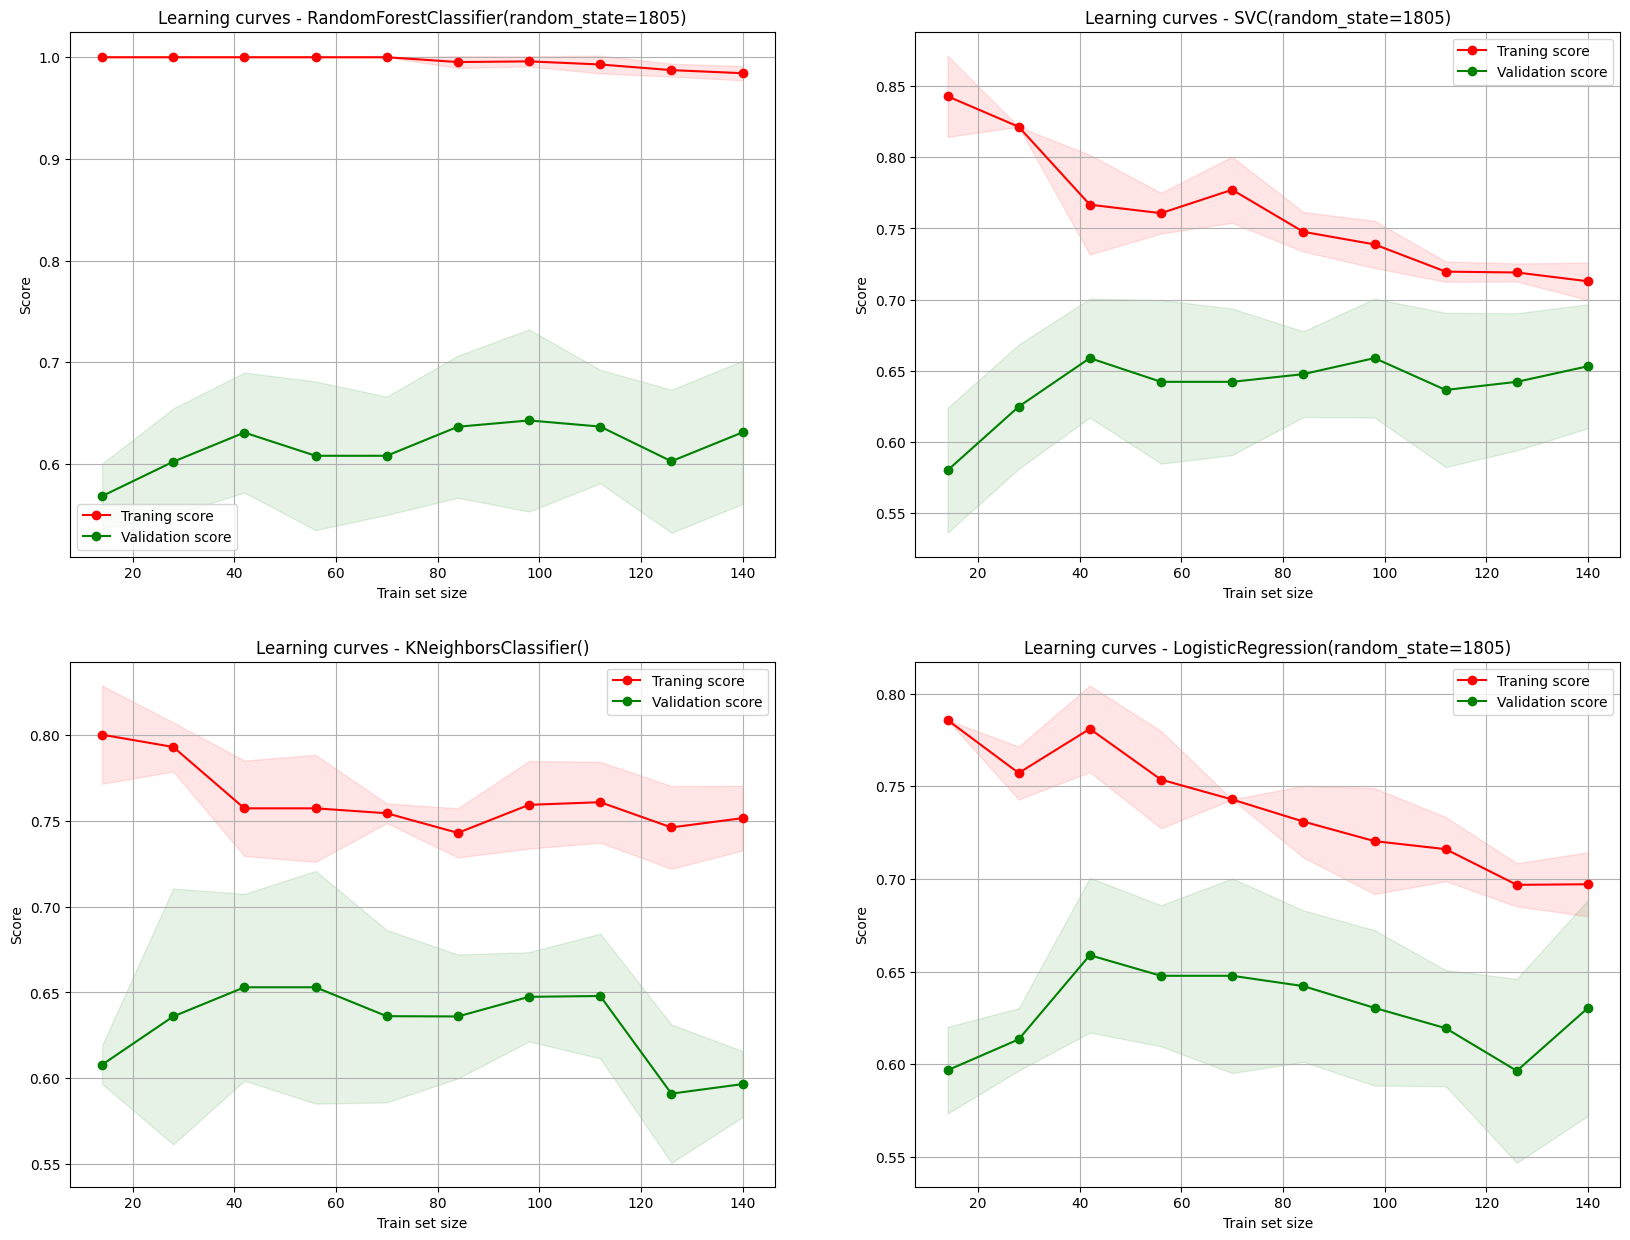

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.84,0.64,0.67,-0.07,Overfitting :0.24,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.67,0.59,0.67,-0.19,Overfitting :0.12,too much complex
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.69,0.61,0.64,-0.12,Overfitting :0.12,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.68,0.59,0.65,-0.18,Overfitting :0.13,too much complex


In [15]:
predict(X_lane_encoded,y_lane, method = 'classification')

### Resampling dataset (create new samples)

In [16]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_encoded,y_lane,n_samples_created=500)

In [17]:
X_lane_resampled, y_lane_resampled = generate_samples(X_lane_resampled,y_lane_resampled, _sampling_strategy='auto')

TOQ (Coll a/o(TTC<1s & braking)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,81,5
1.0,13,101


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        86
         1.0       0.95      0.89      0.92       114

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,79,7
1.0,11,103


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        86
         1.0       0.94      0.90      0.92       114

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,76,10
1.0,9,105


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89        86
         1.0       0.91      0.92      0.92       114

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.91      0.90       200

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,71,15
1.0,21,93


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80        86
         1.0       0.86      0.82      0.84       114

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200

************************************



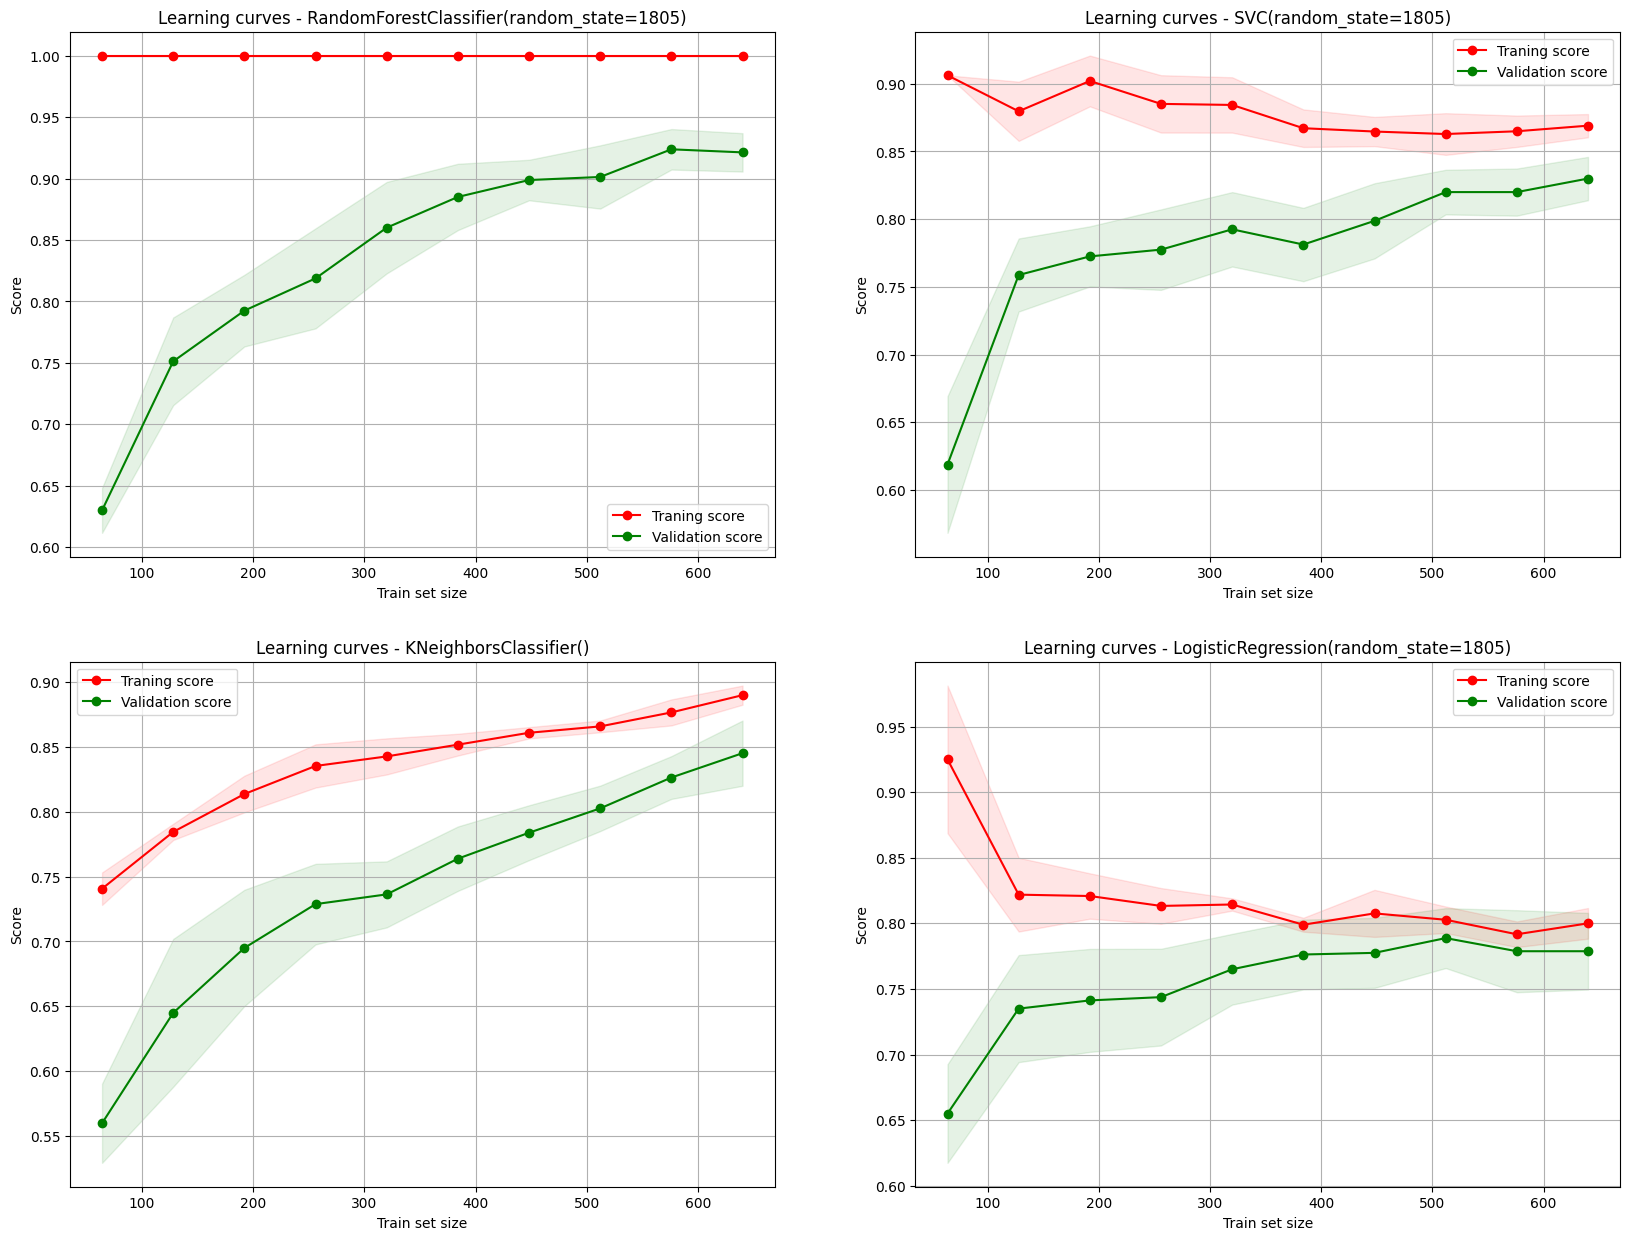

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & braking),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",1.00,0.91,0.92,0.67,Overfitting :0.09,too much complex
1,TOQ (Coll a/o(TTC<1s & braking),SVC,"{'C': 1, 'gamma': 10, 'kernel': 'poly'}",1.00,0.91,0.92,0.67,Overfitting :0.09,too much complex
2,TOQ (Coll a/o(TTC<1s & braking),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.00,0.90,0.92,0.65,Overfitting :0.1,too much complex
3,TOQ (Coll a/o(TTC<1s & braking),Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.81,0.82,0.84,0.38,Underfitting :-0.01,not complexe enough


TOQ (Coll a/o(TTC<1s & steering)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,77,9
1.0,15,99


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        86
         1.0       0.92      0.87      0.89       114

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,82,4
1.0,5,109


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95        86
         1.0       0.96      0.96      0.96       114

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,81,5
1.0,13,101


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        86
         1.0       0.95      0.89      0.92       114

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,62,24
1.0,36,78


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.72      0.67        86
         1.0       0.76      0.68      0.72       114

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200

************************************



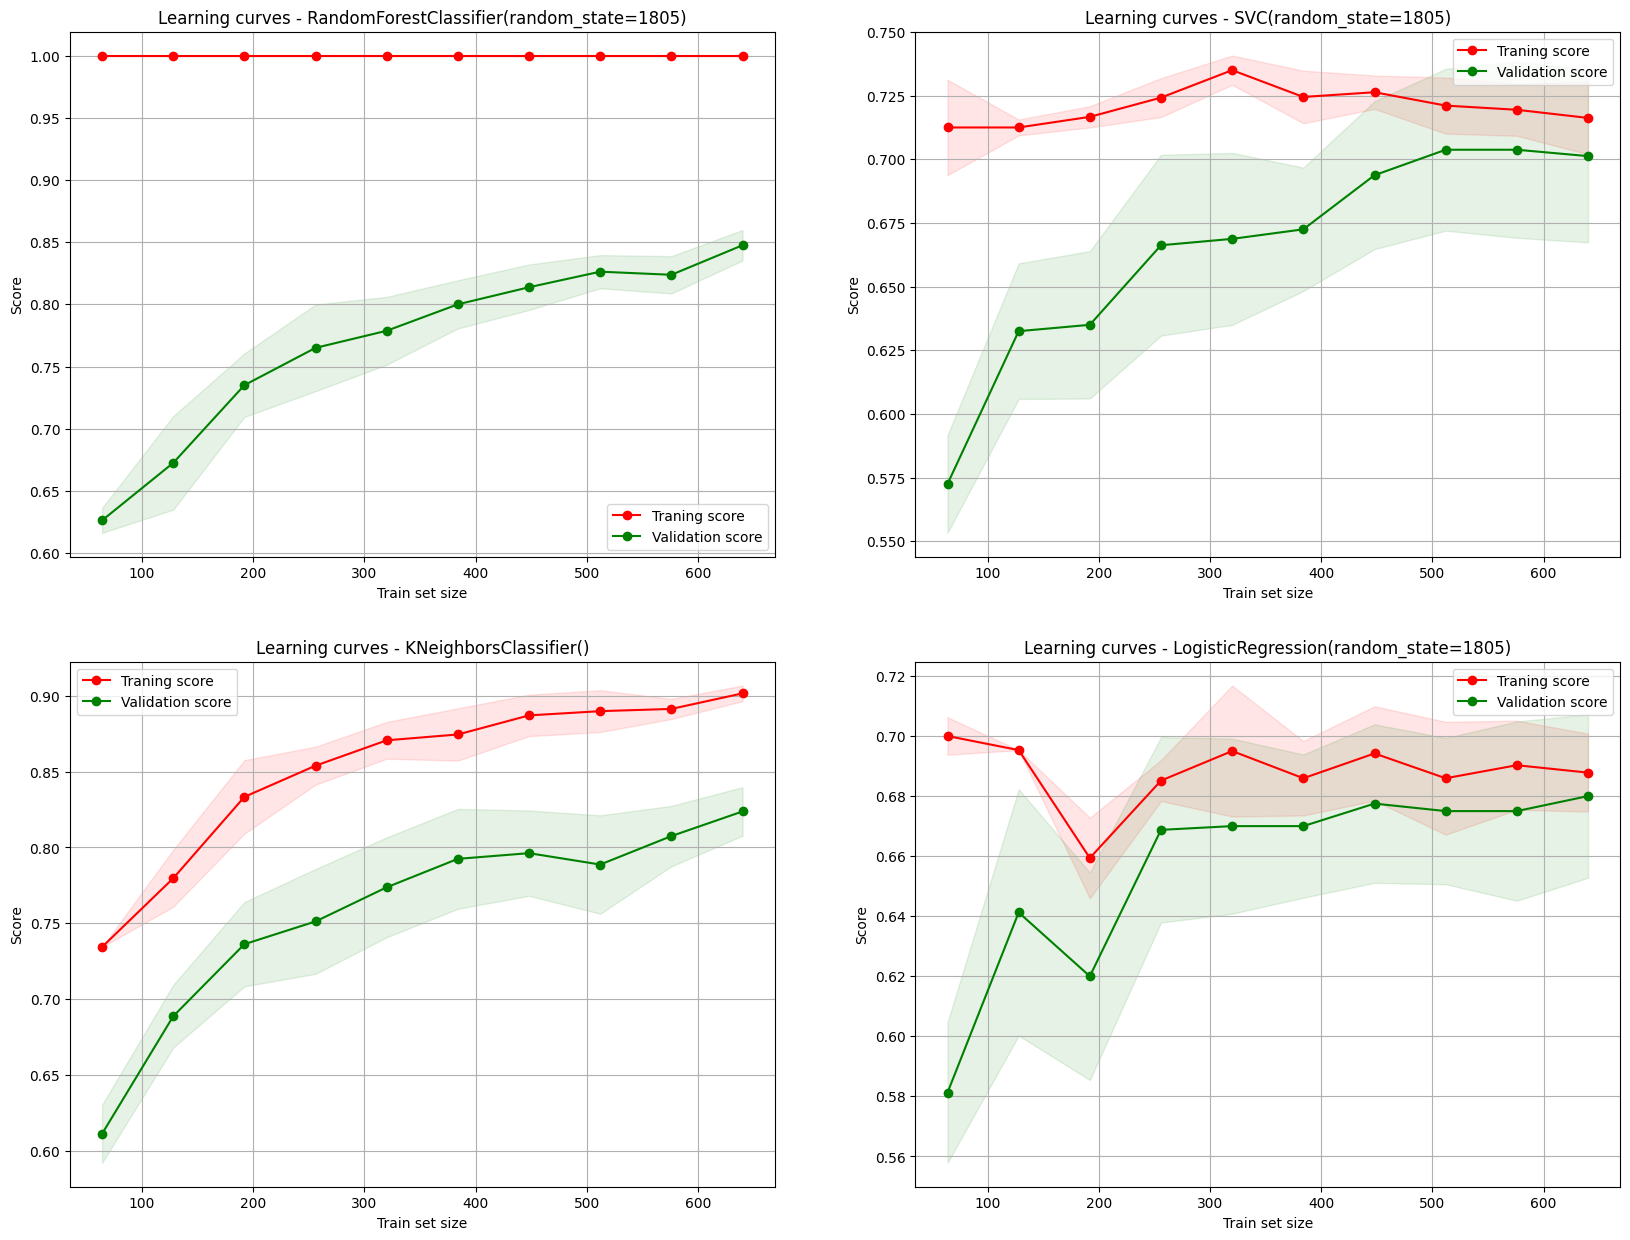

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & steering),Random Forest,"{'max_depth': None, 'max_features': 'auto', 'n...",1.00,0.88,0.89,0.57,Overfitting :0.12,too much complex
1,TOQ (Coll a/o(TTC<1s & steering),SVC,"{'C': 0.1, 'gamma': 10, 'kernel': 'poly'}",1.00,0.96,0.96,0.82,Overfitting :0.04,not complexe enough
2,TOQ (Coll a/o(TTC<1s & steering),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.00,0.91,0.92,0.67,Overfitting :0.09,too much complex
3,TOQ (Coll a/o(TTC<1s & steering),Logistic Regression,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.69,0.70,0.72,0.07,Underfitting :-0.01,not complexe enough


TOQ (Coll a/o(TTC<1s & mirror)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,67,18
1.0,44,71


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      0.79      0.68        85
         1.0       0.80      0.62      0.70       115

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.69       200
weighted avg       0.72      0.69      0.69       200

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,58,27
1.0,35,80


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65        85
         1.0       0.75      0.70      0.72       115

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,68,17
1.0,46,69


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.60      0.80      0.68        85
         1.0       0.80      0.60      0.69       115

    accuracy                           0.69       200
   macro avg       0.70      0.70      0.68       200
weighted avg       0.71      0.69      0.69       200

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,60,25
1.0,45,70


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.57      0.71      0.63        85
         1.0       0.74      0.61      0.67       115

    accuracy                           0.65       200
   macro avg       0.65      0.66      0.65       200
weighted avg       0.67      0.65      0.65       200

************************************



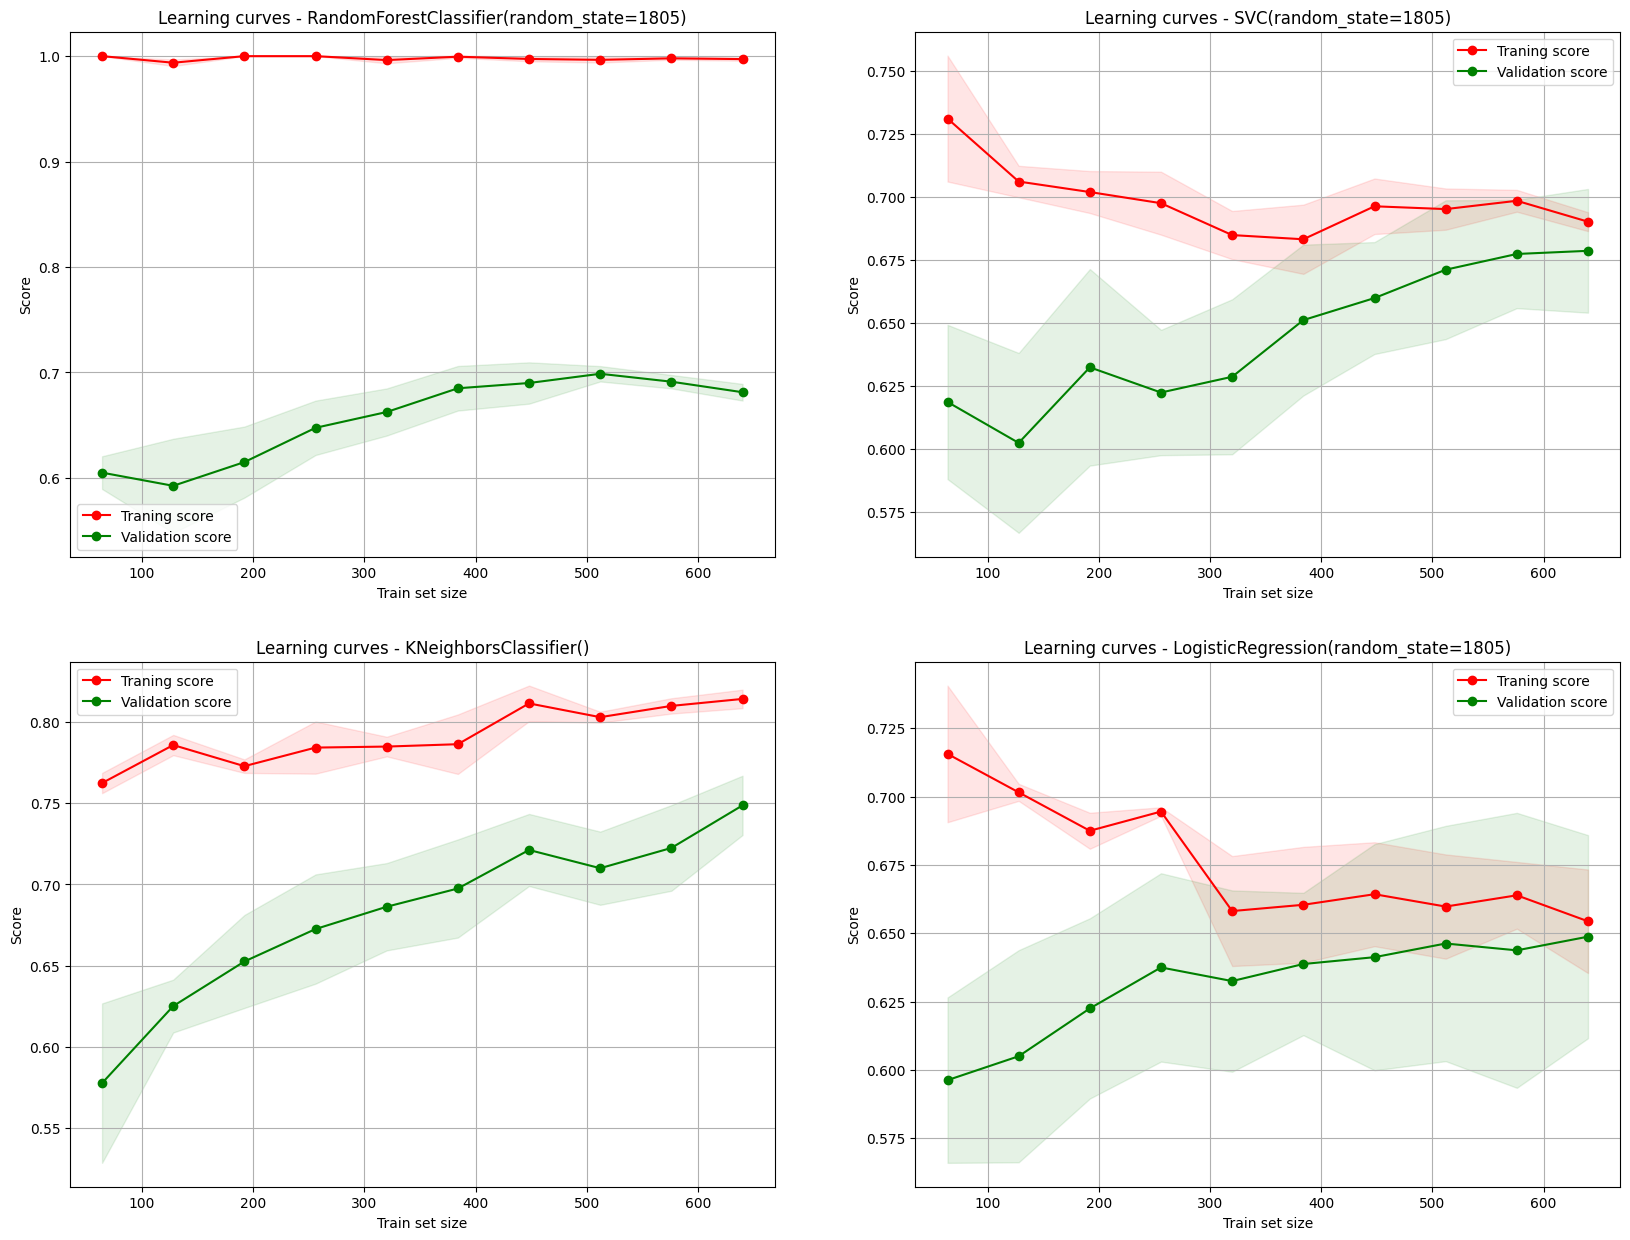

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o(TTC<1s & mirror),Random Forest,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.90,0.69,0.70,0.05,Overfitting :0.23,too much complex
1,TOQ (Coll a/o(TTC<1s & mirror),SVC,"{'C': 10, 'gamma': 10, 'kernel': 'rbf'}",0.74,0.69,0.72,0.05,Overfitting :0.07,too much complex
2,TOQ (Coll a/o(TTC<1s & mirror),KNN Classifier,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}",0.82,0.68,0.69,0.04,Overfitting :0.17,too much complex
3,TOQ (Coll a/o(TTC<1s & mirror),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.65,0.65,0.67,-0.04,Overfitting :0.0,not complexe enough


In [18]:
predict(X_lane_resampled,y_lane_resampled, method = 'classification')

### TAKE-OVER WITHOUT CHANGING LANE

In [19]:
X_no_lane_reduced, no_lane_pvalues = discriminate_target_association(X_no_lane,y_no_lane)

In [20]:
no_lane_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001
TOQ (Coll a/o ILC),0.015,0.275,0.0,0.149,0.0,0.205,0.023,0.042,0.63,0.904,0.958,0.848,0.147,0.405,0.581,0.67,0.27,0.959,0.436,0.453,0.449,0.389,0.486,0.906,0.734,0.909,0.924,0.47,0.943,0.827,0.806,0.579,0.936,0.434,0.576,0.353,0.281,0.374,0.146,0.968,0.876,0.977,0.874,0.344,0.339,0.323,0.235,0.165,0.44,0.668,0.411,0.567,0.335,0.149,0.168,0.138,0.167,0.886,0.455,0.956,0.034,0.015,0.275,0.0,0.149,0.0,0.205,0.023,0.042,0.63,0.904,0.958,0.848,0.147,0.405,0.581,0.67,0.27,0.959,0.436,0.453,0.449,0.389,0.486,0.906,0.734,0.909,0.924,0.47,0.943,0.827,0.806,0.579,0.936,0.434,0.576,0.353,0.281,0.374,0.146,0.968,0.876,0.977,0.874,0.344,0.339,0.323,0.235,0.165,0.44,0.668,0.411,0.567,0.335,0.149,0.168,0.138,0.167,0.886,0.455,0.956,0.034


In [21]:
for key in y_no_lane:
    display(pd.DataFrame(no_lane_pvalues.T[key].sort_values()[:10]))

,TOQ (Coll a/o ILC)
ID Event,0.0
NDRT duration (s),0.0
NDRT duration (s),0.0
ID Event,0.0
Age,0.015
Age,0.015
NDRT solicitation gaze,0.023
NDRT solicitation gaze,0.023
FRONTAL THETA/BETA,0.034
FRONTAL THETA/BETA,0.034


In [22]:
X_no_lane_encoded = encoding_one_hot(X_no_lane_reduced)
list(X_no_lane_encoded.values())[0]

,Age,TOTAL BAND 1-50Hz,FRONTAL THETA/BETA,ID Event_1,ID Event_2,ID Event_3,ID Event_4,ID Event_5,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265,NDRT solicitation gaze_0,NDRT solicitation gaze_1,NDRT solicitation gaze_2
1,0.028571,0.565275,0.432272,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0.028571,0.602121,0.425026,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
8,0.028571,0.766070,0.368963,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
9,0.028571,0.775878,0.420859,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
15,0.171429,0.309742,0.529449,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
16,0.171429,0.306693,0.534040,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
17,0.171429,0.410205,0.496233,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
18,0.171429,0.390192,1.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
24,0.016327,0.401193,0.409029,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
25,0.016327,0.412989,0.391270,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [23]:
for k in X_no_lane_encoded:
    X_no_lane_encoded[k] = X_no_lane_encoded[k].astype(int)

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,4,5
1.0,0,19


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.62         9
         1.0       0.79      1.00      0.88        19

    accuracy                           0.82        28
   macro avg       0.90      0.72      0.75        28
weighted avg       0.86      0.82      0.80        28

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,4,5
1.0,0,19


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.62         9
         1.0       0.79      1.00      0.88        19

    accuracy                           0.82        28
   macro avg       0.90      0.72      0.75        28
weighted avg       0.86      0.82      0.80        28

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,5,4
1.0,2,17


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.71      0.56      0.63         9
         1.0       0.81      0.89      0.85        19

    accuracy                           0.79        28
   macro avg       0.76      0.73      0.74        28
weighted avg       0.78      0.79      0.78        28

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,4,5
1.0,0,19


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.62         9
         1.0       0.79      1.00      0.88        19

    accuracy                           0.82        28
   macro avg       0.90      0.72      0.75        28
weighted avg       0.86      0.82      0.80        28

************************************



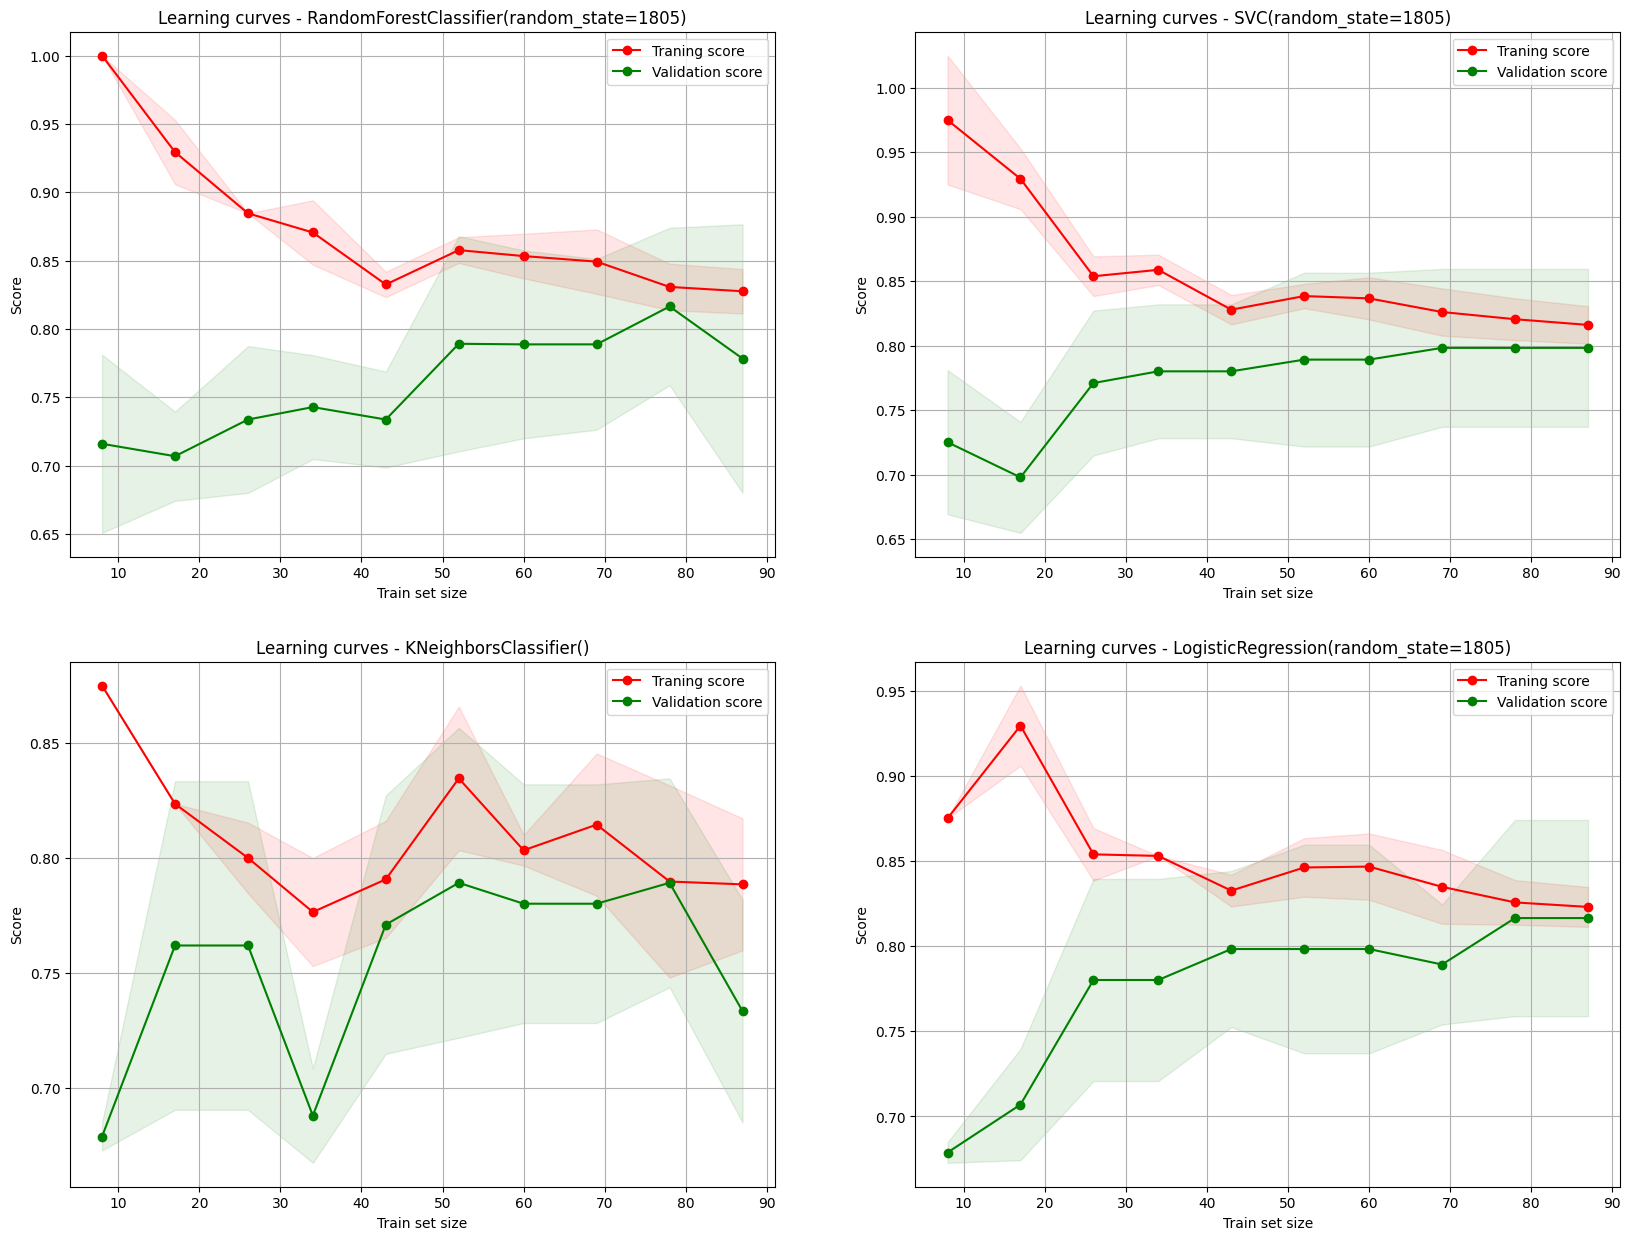

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.83,0.82,0.88,0.24,Overfitting :0.01,not complexe enough
1,TOQ (Coll a/o ILC),SVC,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.82,0.82,0.88,0.24,Overfitting :0.0,not complexe enough
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.81,0.79,0.85,0.19,Overfitting :0.02,not complexe enough
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.82,0.82,0.88,0.24,Overfitting :0.0,not complexe enough


In [24]:
predict(X_no_lane_encoded,y_no_lane, method = 'classification')

### Resampling dataset (create new samples)

In [25]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_encoded,y_no_lane,n_samples_created=200)

In [26]:
X_no_lane_resampled, y_no_lane_resampled = generate_samples(X_no_lane_resampled,y_no_lane_resampled, _sampling_strategy='auto')

In [27]:
X_no_lane_resampled

{'TOQ (Coll a/o  ILC)':      Age  TOTAL BAND 1-50Hz  FRONTAL THETA/BETA  ID Event_1  ID Event_2  \
 0      0                  0                   0           0           0   
 1      0                  0                   0           0           0   
 2      0                  0                   0           0           0   
 3      0                  0                   0           0           0   
 4      0                  0                   0           0           0   
 ..   ...                ...                 ...         ...         ...   
 395    0                  0                   0           0           0   
 396    0                  0                   0           0           0   
 397    0                  0                   0           0           0   
 398    0                  0                   0           0           0   
 399    0                  0                   0           0           0   
 
      ID Event_3  ID Event_4  ID Event_5  NDRT duration (s)_224

TOQ (Coll a/o  ILC)

Random Forest
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,30,3
1.0,10,37


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82        33
         1.0       0.93      0.79      0.85        47

    accuracy                           0.84        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.85      0.84      0.84        80

************************************

SVC
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,30,3
1.0,10,37


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82        33
         1.0       0.93      0.79      0.85        47

    accuracy                           0.84        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.85      0.84      0.84        80

************************************

KNN Classifier
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,31,2
1.0,13,34


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.94      0.81        33
         1.0       0.94      0.72      0.82        47

    accuracy                           0.81        80
   macro avg       0.82      0.83      0.81        80
weighted avg       0.85      0.81      0.81        80

************************************

Logistic Regression
************************************
Confusion Matrix


Predicted classe,0.0,1.0
Real class,,
0.0,25,8
1.0,7,40


....................................
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77        33
         1.0       0.83      0.85      0.84        47

    accuracy                           0.81        80
   macro avg       0.81      0.80      0.81        80
weighted avg       0.81      0.81      0.81        80

************************************



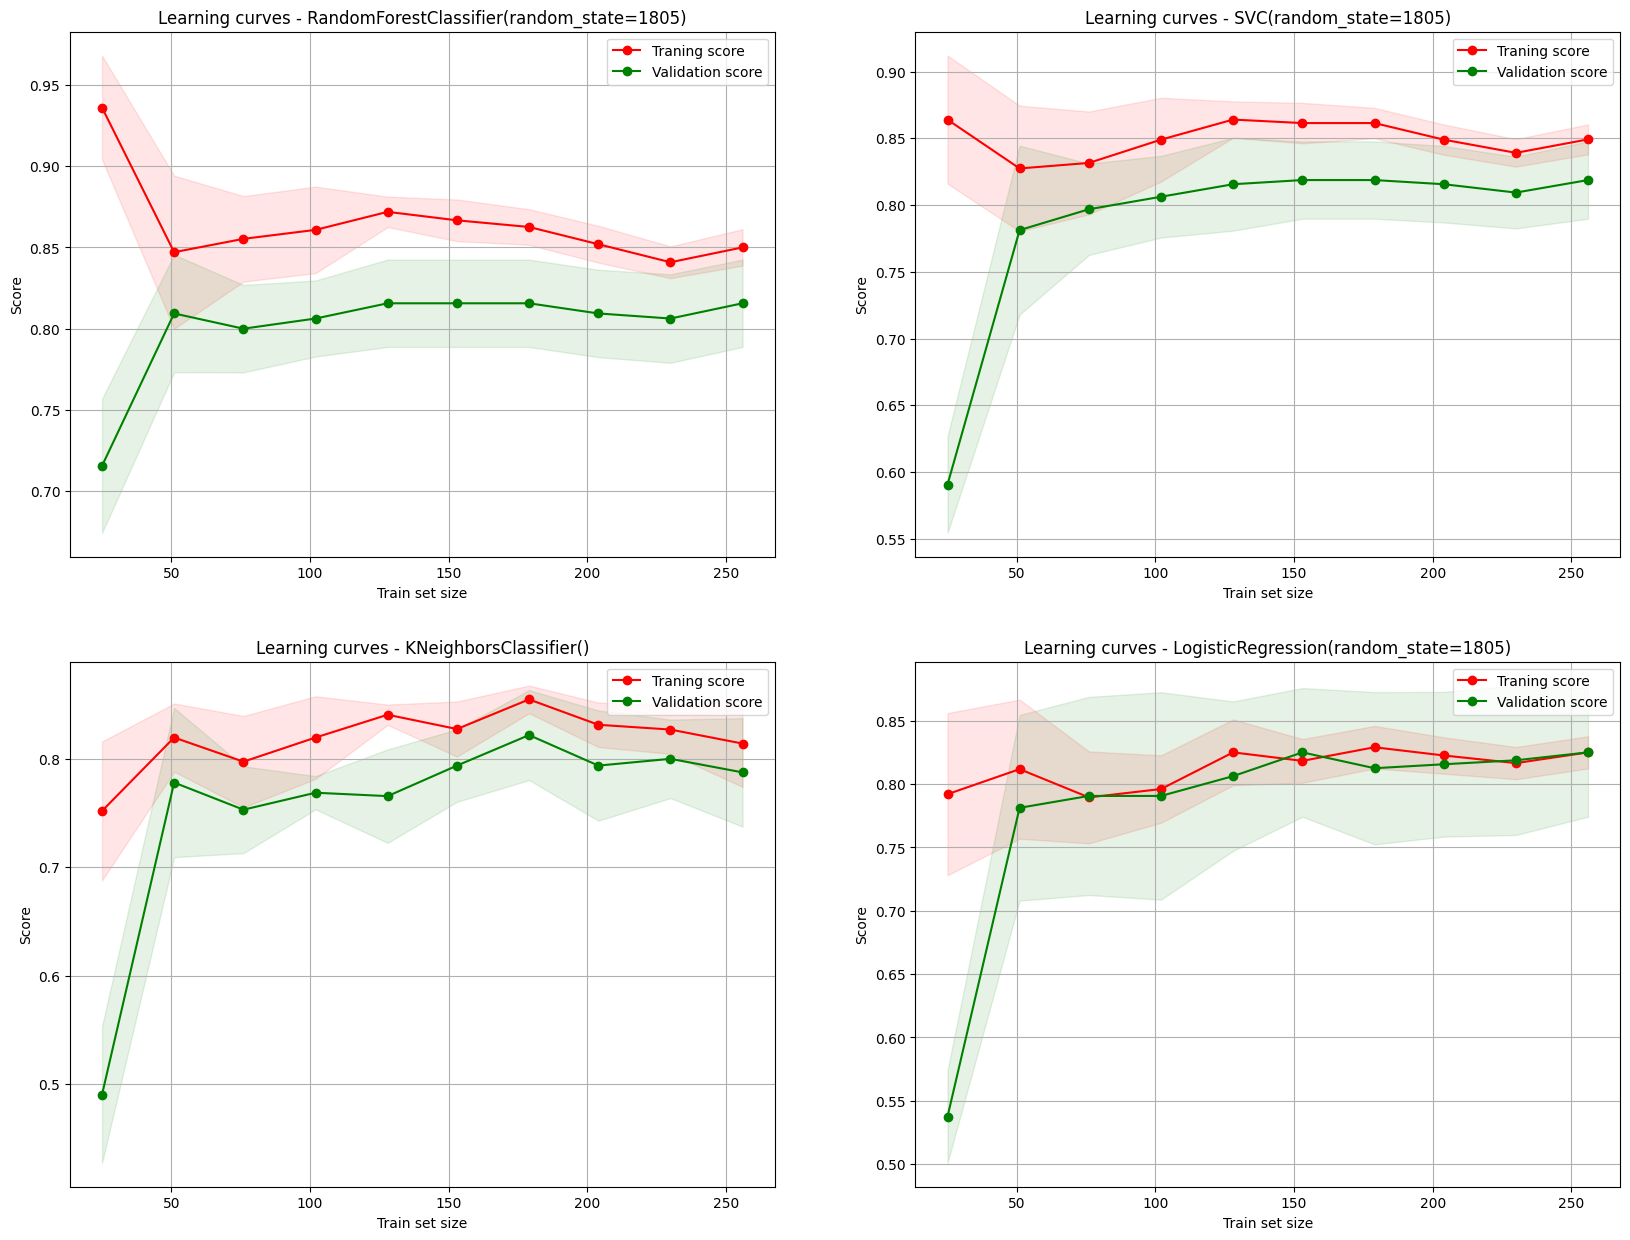

,target,model,hyperparameters,grid_score_train,grid_score_test,f1-score,youden,fitting,complexity
0,TOQ (Coll a/o ILC),Random Forest,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.85,0.84,0.85,0.44,Overfitting :0.01,not complexe enough
1,TOQ (Coll a/o ILC),SVC,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.85,0.84,0.85,0.44,Overfitting :0.01,not complexe enough
2,TOQ (Coll a/o ILC),KNN Classifier,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.84,0.81,0.82,0.37,Overfitting :0.04,not complexe enough
3,TOQ (Coll a/o ILC),Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.82,0.81,0.84,0.35,Overfitting :0.01,not complexe enough


In [28]:
predict(X_no_lane_resampled,y_no_lane_resampled, method = 'classification')

### TAKE-OVER TIME

In [29]:
X_TOT_reduced, TOT_pvalues = discriminate_target_association(X_TOT,y_TOT)

In [30]:
X_TOT_encoded = encoding_one_hot(X_TOT_reduced)
list(X_TOT_encoded.values())[0]

,FRONTAL THETA/BETA,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265
0,0.414017,0,1,0,0,0,0,0,0,0,0,0,0
1,0.432272,0,0,0,0,0,0,0,1,0,0,0,0
2,0.425026,0,0,0,1,0,0,0,0,0,0,0,0
3,0.439017,1,0,0,0,0,0,0,0,0,0,0,0
4,0.410870,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.575577,0,0,1,0,0,0,0,0,0,0,0,0
353,0.540931,0,0,0,0,1,0,0,0,0,0,0,0
354,0.352224,0,0,0,0,0,0,0,0,0,0,0,1
355,0.541869,0,0,0,0,0,0,1,0,0,0,0,0


In [31]:
list(X_TOT_reduced.values())[0]

,FRONTAL THETA/BETA,NDRT duration (s)_128,NDRT duration (s)_161,NDRT duration (s)_166,NDRT duration (s)_224,NDRT duration (s)_250,NDRT duration (s)_298,NDRT duration (s)_322,NDRT duration (s)_351,NDRT duration (s)_354,NDRT duration (s)_647,NDRT duration (s)_872,NDRT duration (s)_1265
0,0.414017,0,1,0,0,0,0,0,0,0,0,0,0
1,0.432272,0,0,0,0,0,0,0,1,0,0,0,0
2,0.425026,0,0,0,1,0,0,0,0,0,0,0,0
3,0.439017,1,0,0,0,0,0,0,0,0,0,0,0
4,0.410870,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.575577,0,0,1,0,0,0,0,0,0,0,0,0
353,0.540931,0,0,0,0,1,0,0,0,0,0,0,0
354,0.352224,0,0,0,0,0,0,0,0,0,0,0,1
355,0.541869,0,0,0,0,0,0,1,0,0,0,0,0


In [32]:
TOT_pvalues

,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA,Age,Gender,ID Event,ID NDRT,NDRT duration (s),NDRT solicitation hands,NDRT solicitation gaze,TOTAL BAND 1-50Hz,DELTA 1-4Hz,THETA 4-8Hz,ALPHA TOTAL 8-13Hz,ALPHA LOW 8-10Hz,ALPHA HIGH 10-13Hz,BETA TOTAL 13-30Hz,BETA LOW 13-17Hz,BETA HIGH 17-30Hz,GAMMA 30-50Hz,Fz TOTAL BAND 1-50Hz,Fz DELTA 1-4Hz,Fz THETA 4-8Hz,Fz ALPHA TOTAL 8-13Hz,Fz ALPHA LOW 8-10Hz,Fz ALPHA HIGH 10-13Hz,Fz BETA TOTAL 13-30Hz,Fz BETA LOW 13-17Hz,Fz BETA HIGH 17-30Hz,Fz GAMMA 30-50Hz,Cz TOTAL BAND 1-50Hz,Cz DELTA 1-4Hz,Cz THETA 4-8Hz,Cz ALPHA TOTAL 8-13Hz,Cz ALPHA LOW 8-10Hz,Cz ALPHA HIGH 10-13Hz,Cz BETA TOTAL 13-30Hz,Cz BETA LOW 13-17Hz,Cz BETA HIGH 17-30Hz,Cz GAMMA 30-50Hz,Pz TOTAL BAND 1-50Hz,Pz DELTA 1-4Hz,Pz THETA 4-8Hz,Pz ALPHA TOTAL 8-13Hz,Pz ALPHA LOW 8-10Hz,Pz ALPHA HIGH 10-13Hz,Pz BETA TOTAL 13-30Hz,Pz BETA LOW 13-17Hz,Pz BETA HIGH 17-30Hz,Pz GAMMA 30-50Hz,Oz TOTAL BAND 1-50Hz,Oz DELTA 1-4Hz,Oz THETA 4-8Hz,Oz ALPHA TOTAL 8-13Hz,Oz ALPHA LOW 8-10Hz,Oz ALPHA HIGH 10-13Hz,Oz BETA TOTAL 13-30Hz,Oz BETA LOW 13-17Hz,Oz BETA HIGH 17-30Hz,Oz GAMMA 30-50Hz,TOTAL FRONTAL BAND,FRONTAL THETA,FRONTAL BETA,FRONTAL THETA/BETA
shapiro,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TOT (s),0.121,0.709,0.053,0.259,0.033,0.086,0.286,0.464,0.762,0.601,0.405,0.444,0.381,0.443,0.512,0.385,0.448,0.875,0.838,0.872,0.899,0.973,0.851,0.851,0.997,0.803,0.803,0.67,0.889,0.711,0.567,0.64,0.519,0.613,0.69,0.59,0.721,0.704,0.529,0.995,0.76,0.818,0.743,0.932,0.856,0.87,0.602,0.425,0.688,0.454,0.317,0.33,0.31,0.33,0.385,0.315,0.4,0.518,0.886,0.505,0.042,0.121,0.709,0.053,0.259,0.033,0.086,0.286,0.464,0.762,0.601,0.405,0.444,0.381,0.443,0.512,0.385,0.448,0.875,0.838,0.872,0.899,0.973,0.851,0.851,0.997,0.803,0.803,0.67,0.889,0.711,0.567,0.64,0.519,0.613,0.69,0.59,0.721,0.704,0.529,0.995,0.76,0.818,0.743,0.932,0.856,0.87,0.602,0.425,0.688,0.454,0.317,0.33,0.31,0.33,0.385,0.315,0.4,0.518,0.886,0.505,0.042


In [33]:
for key in y_TOT:
    display(pd.DataFrame(TOT_pvalues.T[key].sort_values()[:10]))

,TOT (s)
NDRT duration (s),0.033
NDRT duration (s),0.033
FRONTAL THETA/BETA,0.042
FRONTAL THETA/BETA,0.042
ID Event,0.053
ID Event,0.053
NDRT solicitation hands,0.086
NDRT solicitation hands,0.086
Age,0.121
Age,0.121


TOT (s)



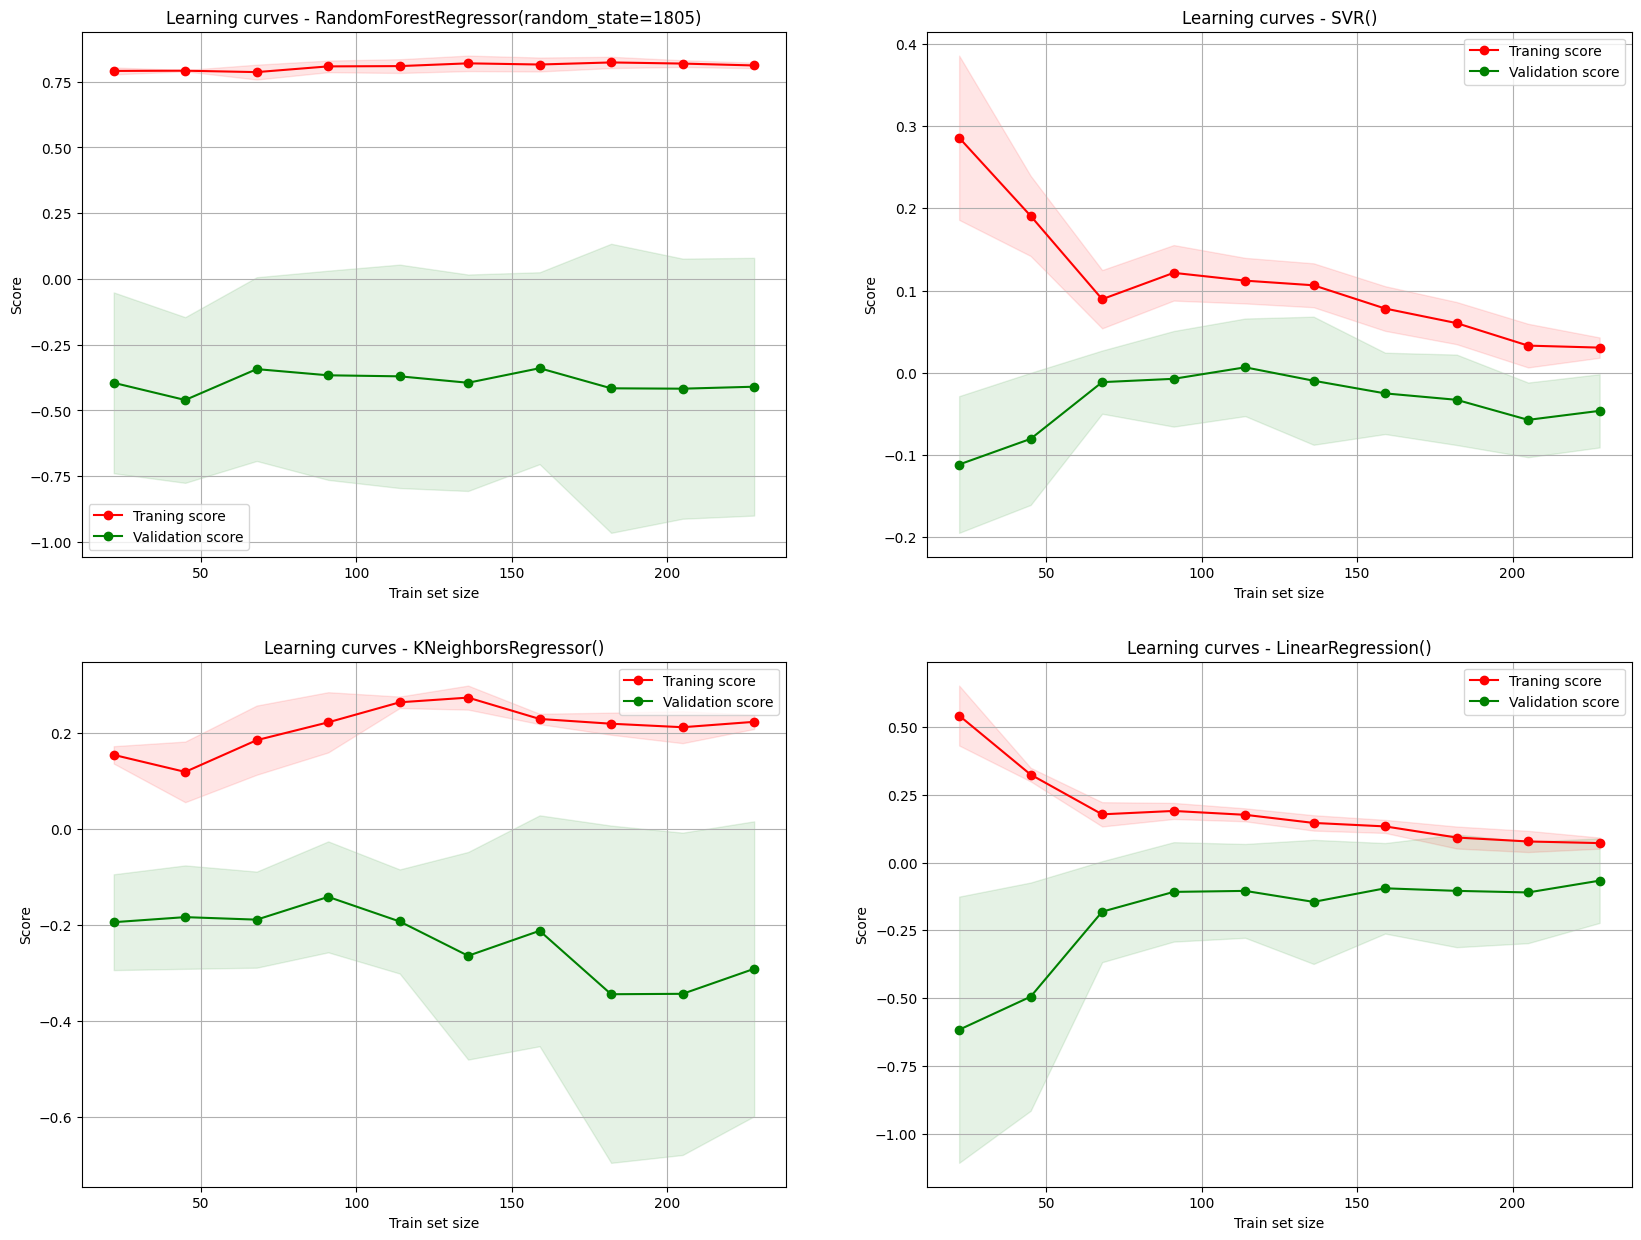

,target,model,hyperparameters,grid_score_train,grid_score_test,mse,mae,rmse,mean_error (s),fitting,complexity
0,TOT (s),Random Forest,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.28,-0.07,0.062,0.158,0.249,0.158,Overfitting :1.25,too much complex
1,TOT (s),SVR,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}",-0.00,-0.05,0.061,0.146,0.247,0.146,Underfitting :-inf,not complexe enough
2,TOT (s),KNN Regressor,"{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}",0.06,-0.13,0.065,0.160,0.256,0.160,Overfitting :3.17,too much complex
3,TOT (s),Linear Regression,{},0.07,-0.12,0.065,0.165,0.254,0.165,Overfitting :2.71,too much complex


In [34]:
predict(X_TOT_encoded,y_TOT, method = 'regression')